#                                         `YULU BIKES`

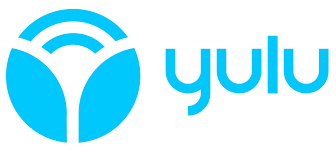

*Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.*

*Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!*

*Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.*

### Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [8]:
sum(df.isna().sum())

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

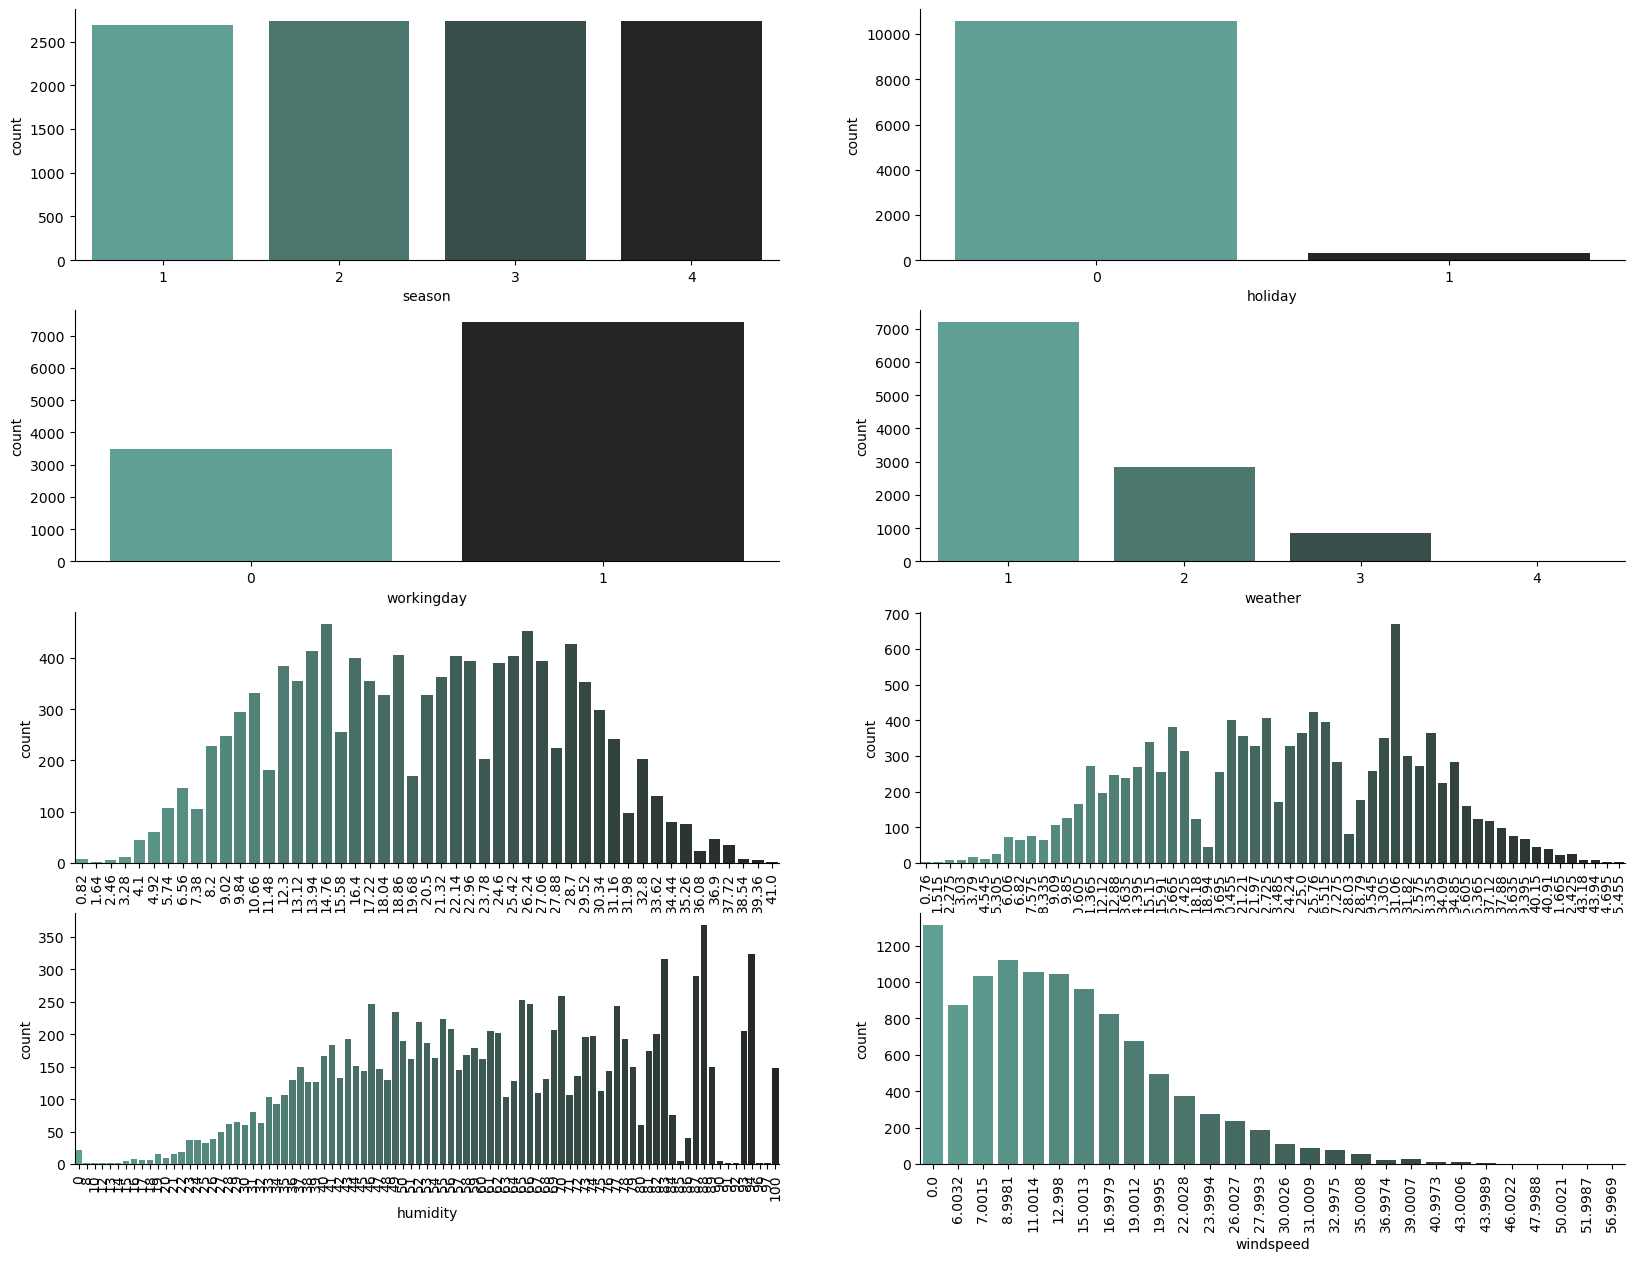

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.countplot(x=df['season'],palette="dark:#5A9_r")
plt.subplot(4,2,2)
sns.countplot(x=df['holiday'],palette="dark:#5A9_r")
plt.subplot(4,2,3)
sns.countplot(x=df['workingday'],palette="dark:#5A9_r")
plt.subplot(4,2,4)
sns.countplot(x=df['weather'],palette="dark:#5A9_r")
plt.subplot(4,2,5)
sns.countplot(x=df['temp'],palette="dark:#5A9_r")
plt.xticks(rotation=90)
plt.subplot(4,2,6)
sns.countplot(x=df['atemp'],palette="dark:#5A9_r")
plt.xticks(rotation=90)
plt.subplot(4,2,7)
sns.countplot(x=df['humidity'],palette="dark:#5A9_r")
plt.xticks(rotation=90)
plt.subplot(4,2,8)
sns.countplot(x=df['windspeed'],palette="dark:#5A9_r")
plt.xticks(rotation=90)
sns.despine()
plt.show()

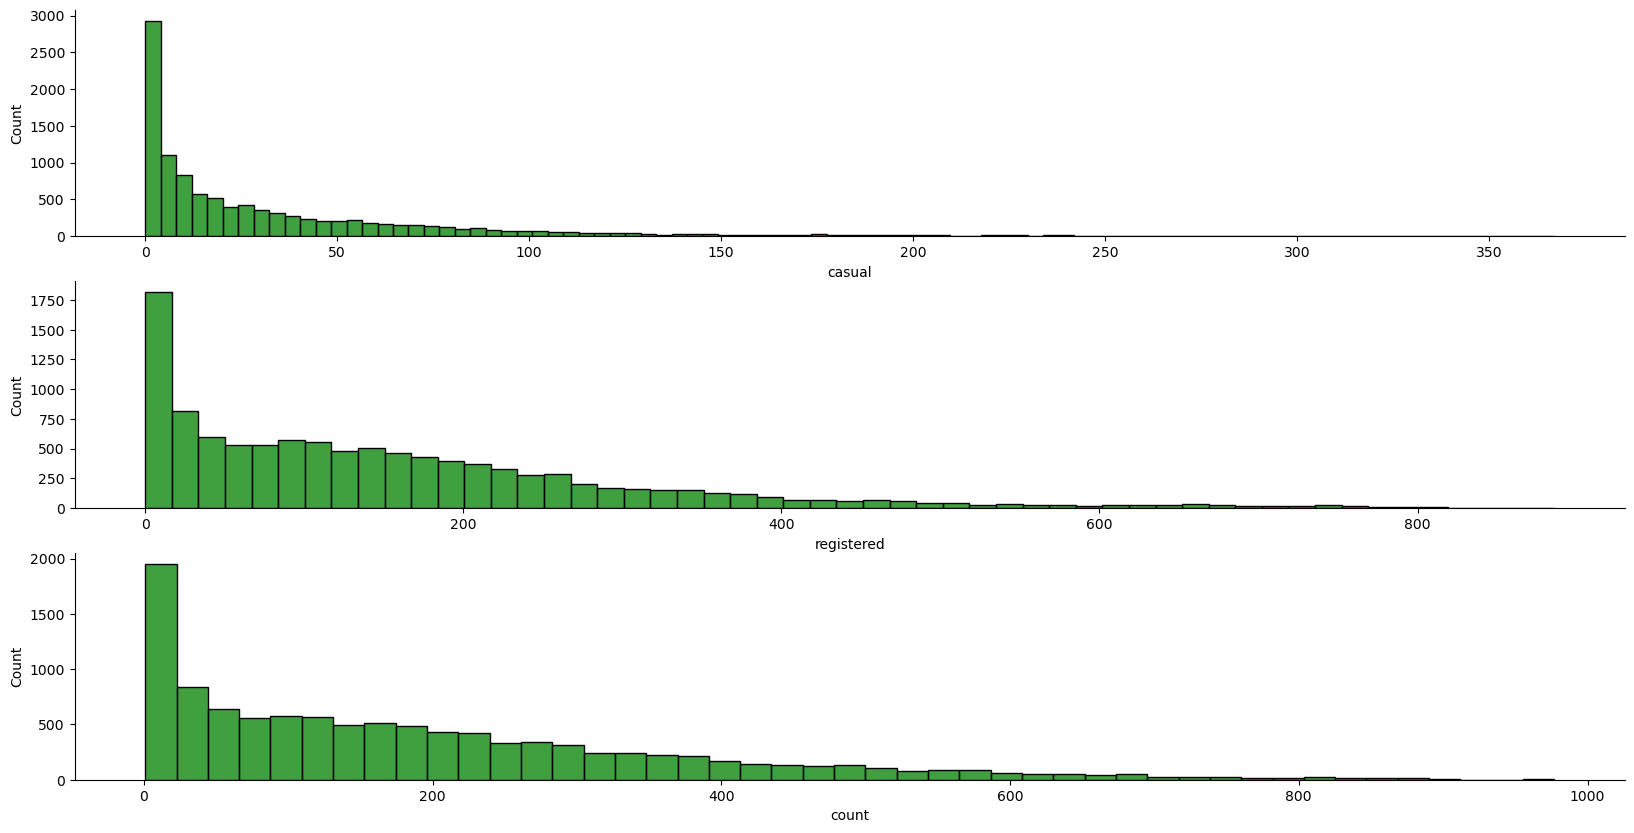

In [13]:
plt.figure(figsize=(20,10))
bins='auto'
plt.subplot(3,1,1)
sns.histplot(x=df['casual'],color='green',bins=bins)
plt.subplot(3,1,2)
sns.histplot(x=df['registered'],color="green",bins=bins)
plt.subplot(3,1,3)
sns.histplot(x=df['count'],color="green",bins=bins)
sns.despine()
plt.show()

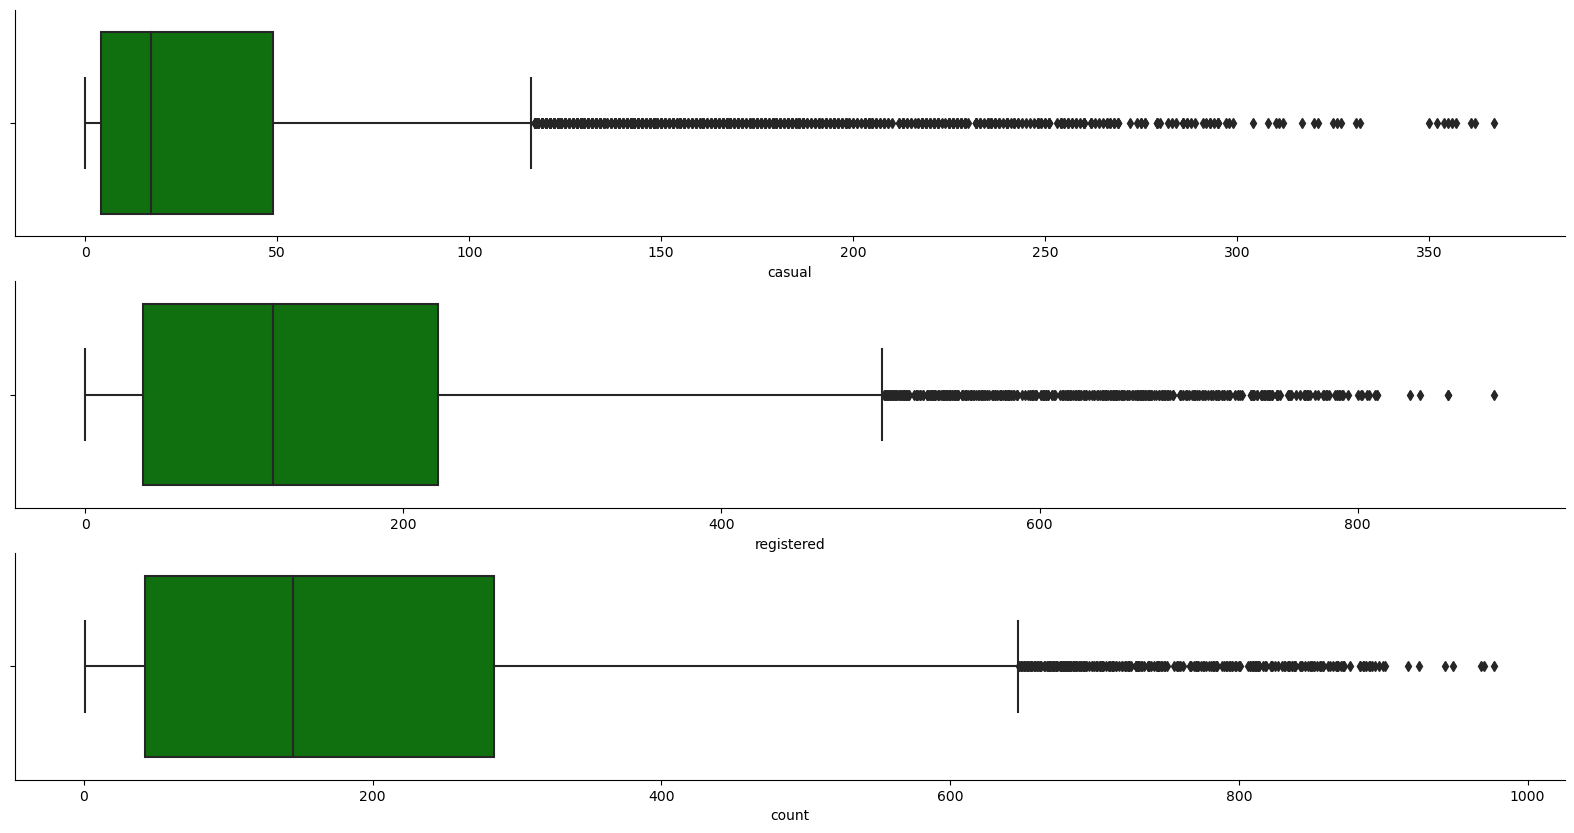

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(x=df['casual'],color='green')
plt.subplot(3,1,2)
sns.boxplot(x=df['registered'],color='green')
plt.subplot(3,1,3)
sns.boxplot(x=df['count'],color='green')
sns.despine()
plt.show()

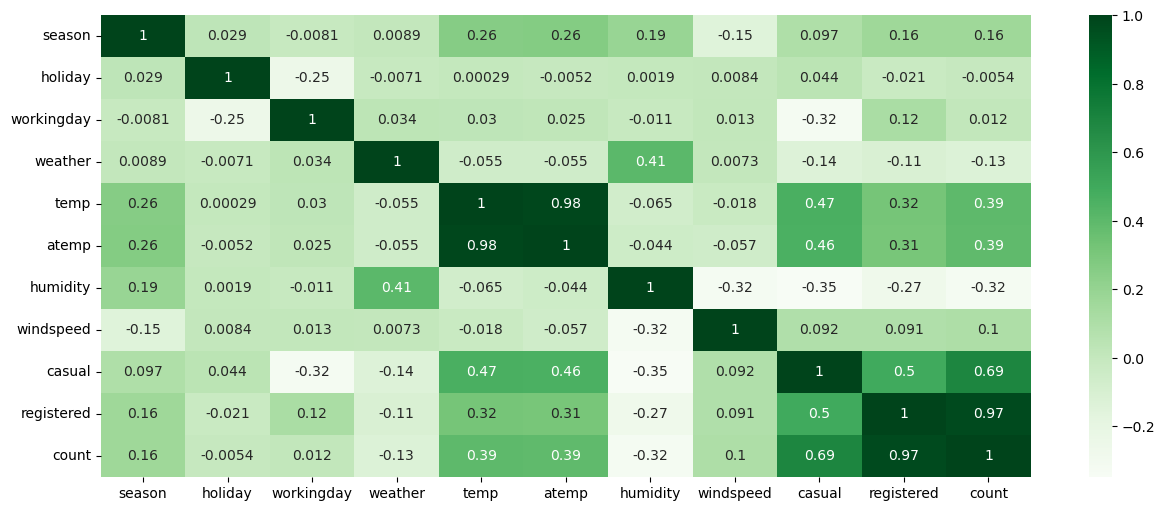

In [15]:
plt.figure(figsize=(15,6))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

# `DATA PRE-PROCESSING `

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [17]:
df['hour of day'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['week'] = df['datetime'].dt.week
df['quarter'] = df['datetime'].dt.quarter

In [18]:
df.drop(columns='datetime',inplace=True)

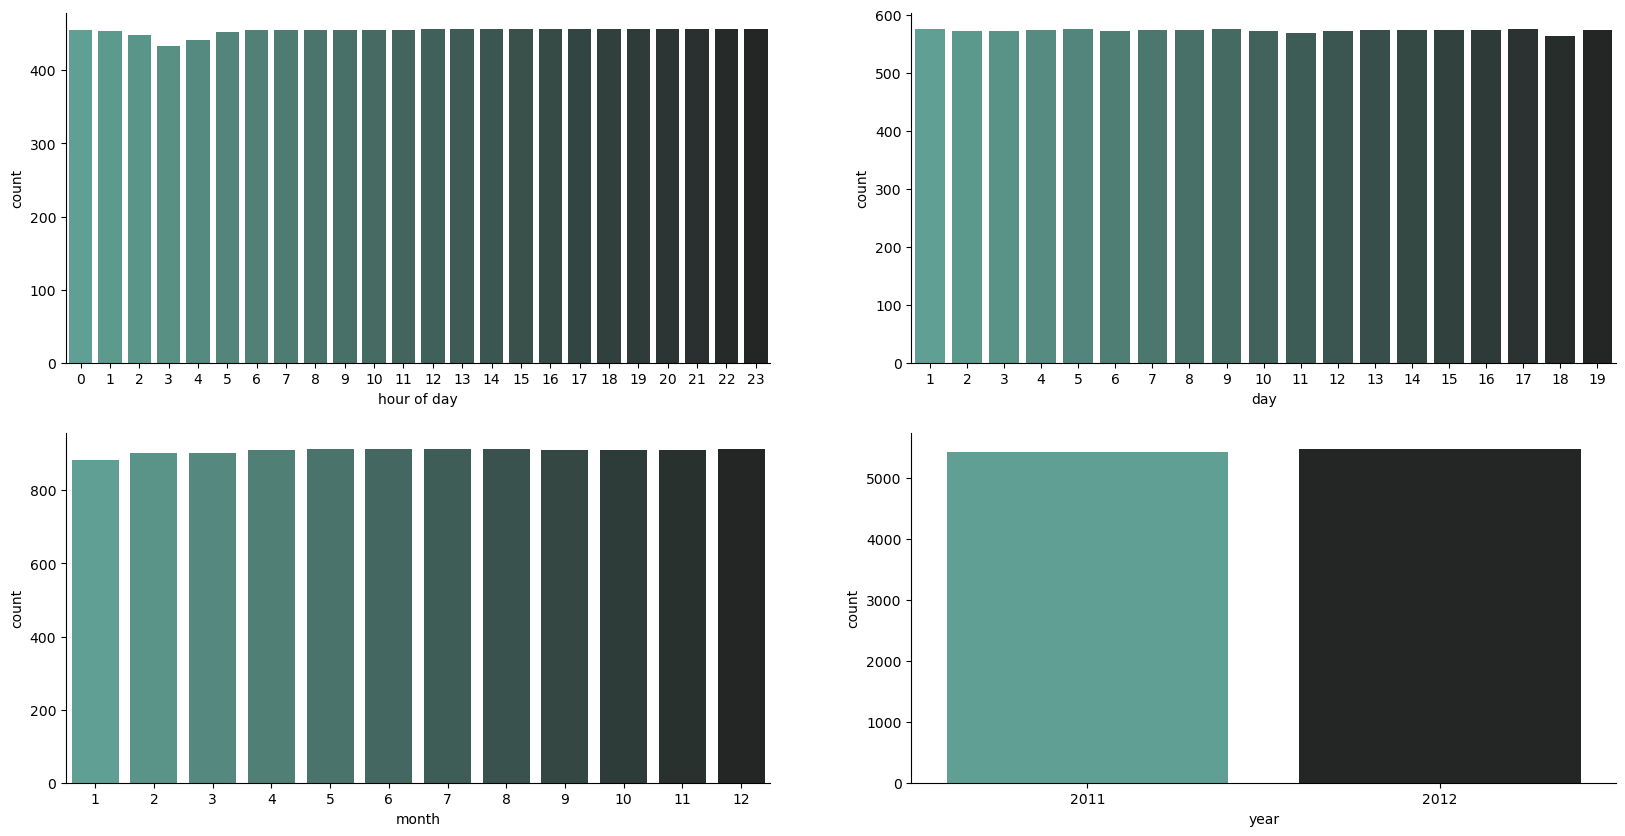

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x=df['hour of day'],palette="dark:#5A9_r")
plt.subplot(2,2,2)
sns.countplot(x=df['day'],palette="dark:#5A9_r")
plt.subplot(2,2,3)
sns.countplot(x=df['month'],palette="dark:#5A9_r")
plt.subplot(2,2,4)
sns.countplot(x=df['year'],palette="dark:#5A9_r")
sns.despine()
plt.show()

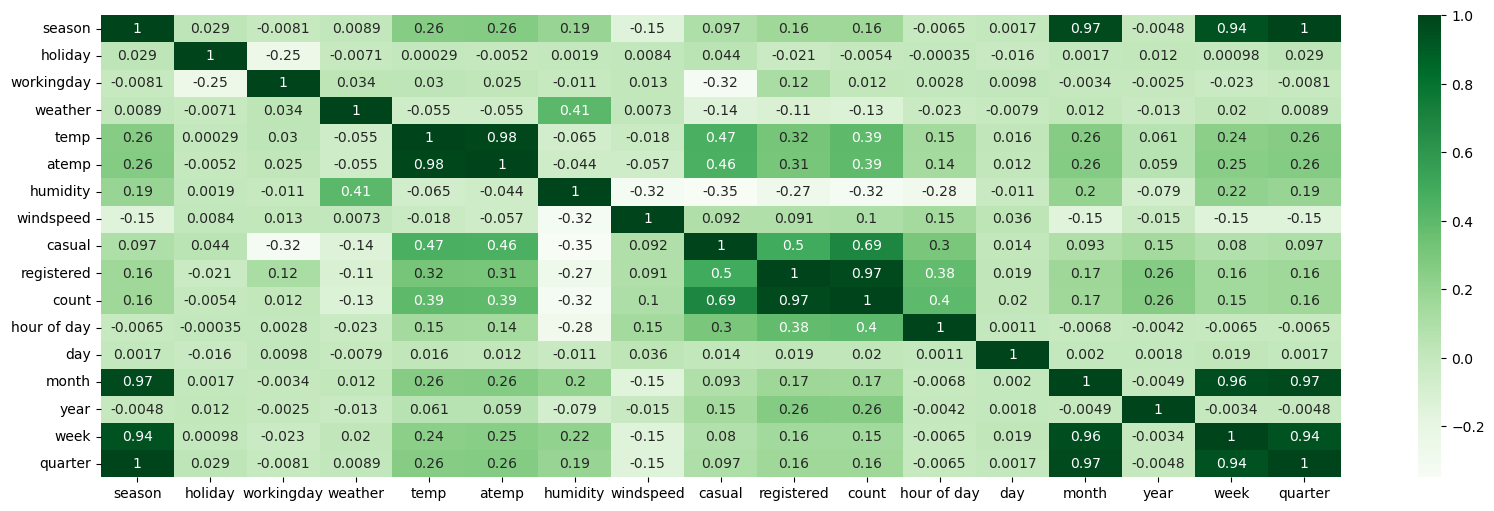

In [20]:
plt.figure(figsize=(20,6))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

### `Observations:-`

* There is strong positive correlation between count with "casual(0.72)" and "rental(0.91)" which is obvious as it is sum of those two variables
* There is also somewhat a strong positive relation between "count" and "temp(0.39)/atemp(0.38)" which suggests that as the temperature increases, the count also increases
* There is somewhat a strong positive relation (0.43) between "count" and "hour". "count" and "humidity" have a negative correlation of -0.32. This means that as humidity increases, the bike rental count tends to decrease.
* This is ofcourse just a first glance, we have to perform various statistical tests in order to actually confirm our findings

# `DATA ANALYSIS`

In [21]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour of day,day,month,year,week,quarter
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,52,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,52,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,52,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,52,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,52,1


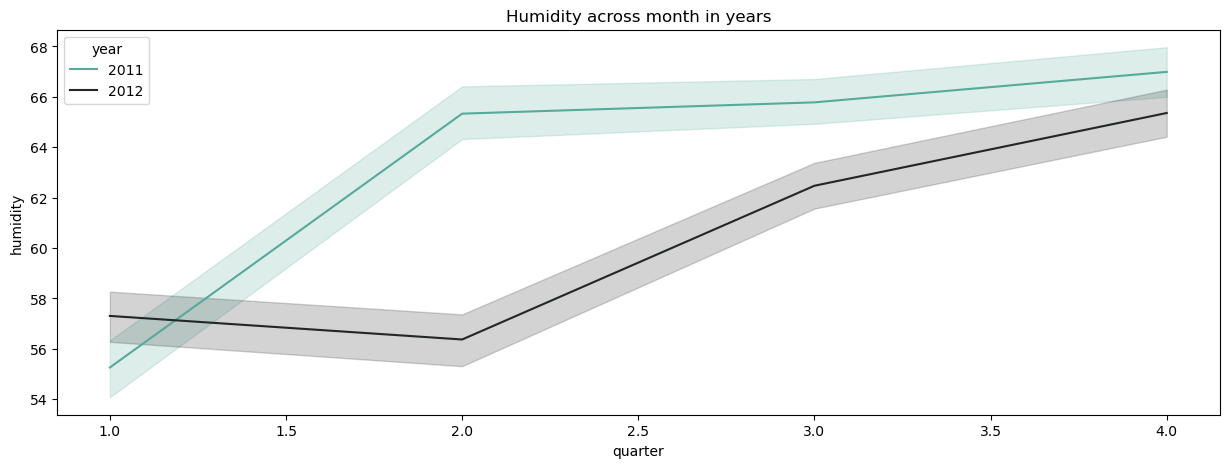

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['quarter'],y=df['humidity'],hue=df['year'],palette="dark:#5A9_r")
plt.title('Humidity across month in years')
plt.show()

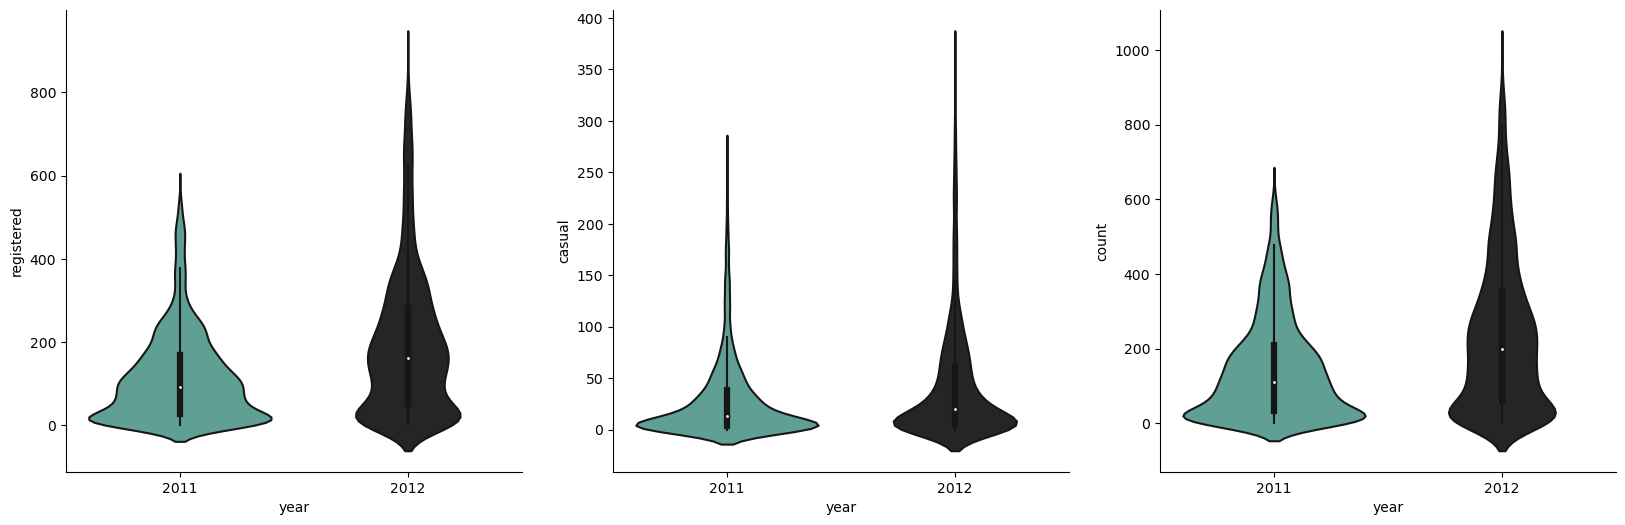

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.violinplot(x=df.year,y=df.registered,palette="dark:#5A9_r")
plt.subplot(1,3,2)
sns.violinplot(x=df.year,y=df.casual,palette="dark:#5A9_r")
plt.subplot(1,3,3)
sns.violinplot(x=df.year,y=df['count'],palette="dark:#5A9_r")
sns.despine()
plt.show()

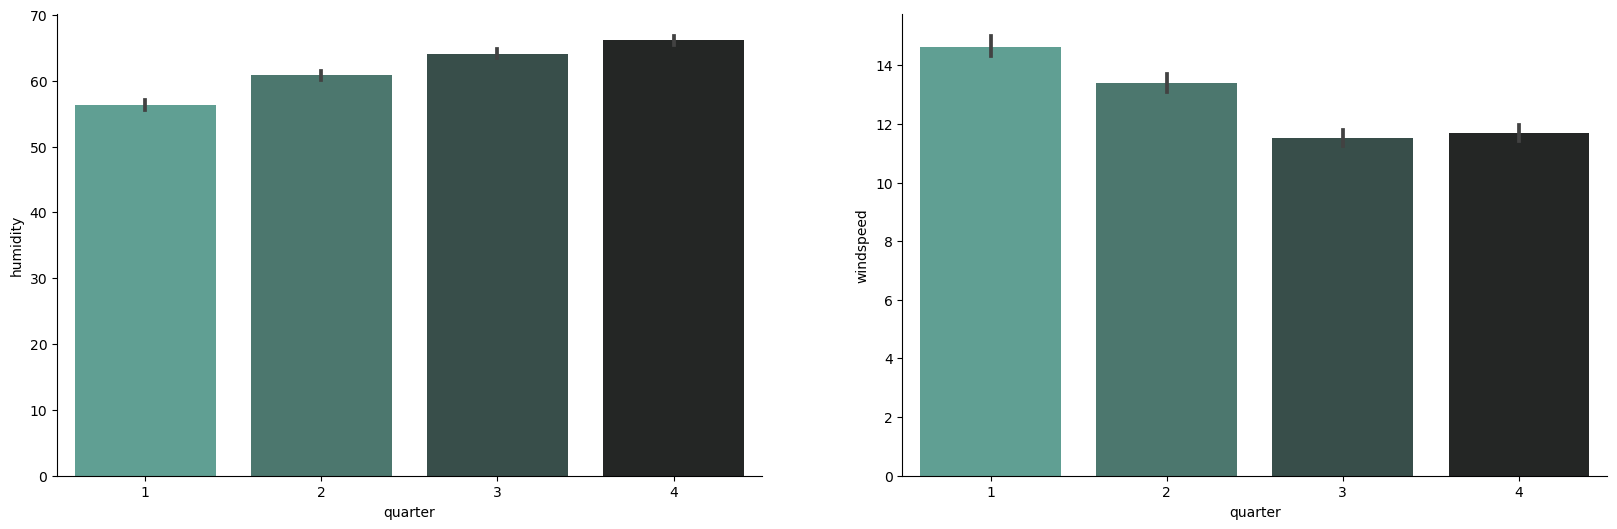

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=df['quarter'],y=df['humidity'],palette="dark:#5A9_r")
plt.subplot(1,2,2)
sns.barplot(x=df['quarter'],y=df['windspeed'],palette="dark:#5A9_r")
sns.despine()
plt.show()

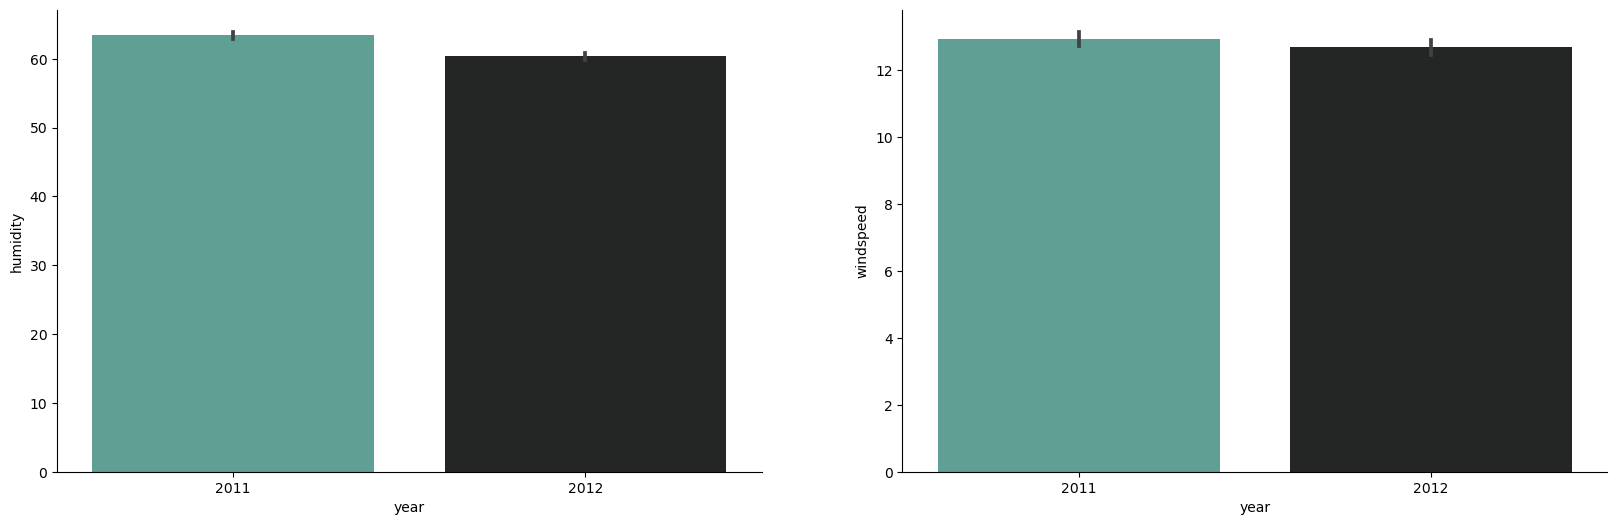

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=df['year'],y=df['humidity'],palette="dark:#5A9_r")
plt.subplot(1,2,2)
sns.barplot(x=df['year'],y=df['windspeed'],palette="dark:#5A9_r")
sns.despine()
plt.show()

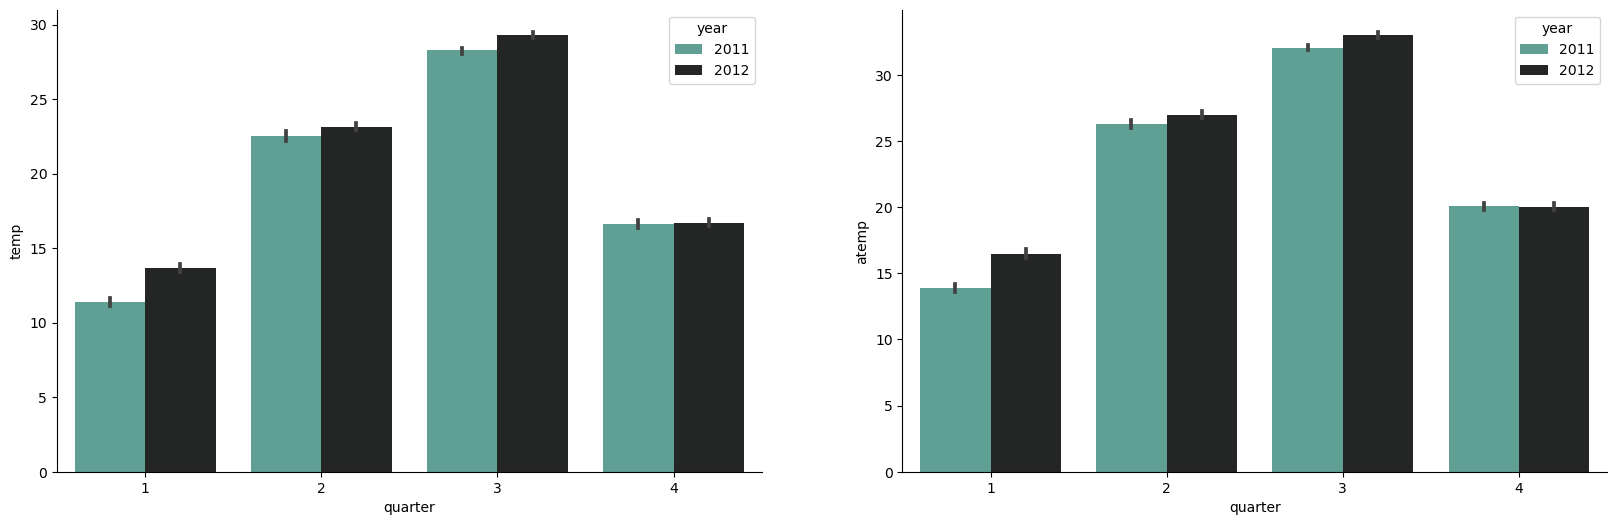

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=df['quarter'],y=df['temp'],hue=df.year,palette="dark:#5A9_r")
plt.subplot(1,2,2)
sns.barplot(x=df['quarter'],y=df['atemp'],hue=df.year,palette="dark:#5A9_r")
sns.despine()
plt.show()

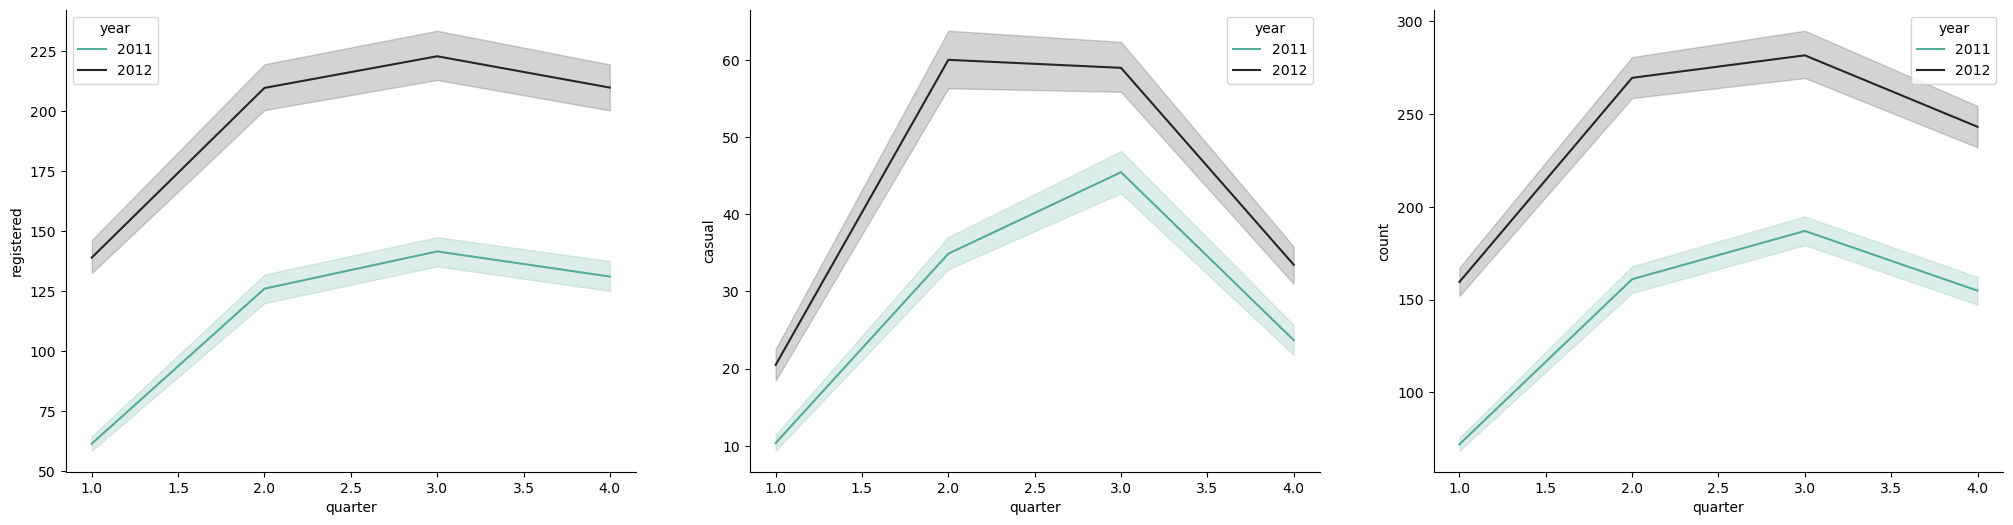

In [44]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.lineplot(x=df['quarter'],y=df['registered'],hue=df['year'],palette="dark:#5A9_r")
plt.subplot(1,3,2)
sns.lineplot(x=df['quarter'],y=df['casual'],hue=df['year'],palette="dark:#5A9_r")
plt.subplot(1,3,3)
sns.lineplot(x=df['quarter'],y=df['count'],hue=df['year'],palette="dark:#5A9_r")
sns.despine()
plt.show()

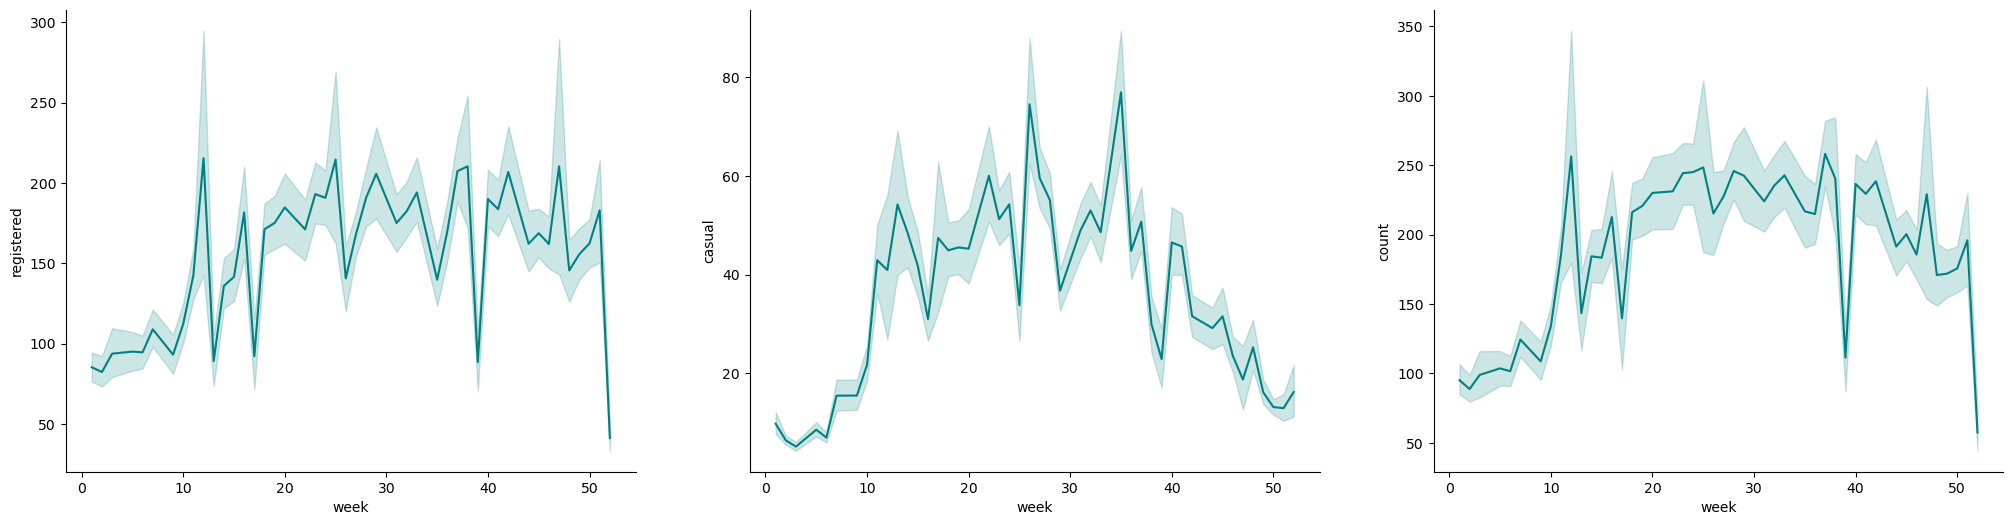

In [27]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.lineplot(x=df['week'],y=df['registered'],color='teal')
plt.subplot(1,3,2)
sns.lineplot(x=df['week'],y=df['casual'],color='teal')
plt.subplot(1,3,3)
sns.lineplot(x=df['week'],y=df['count'],color='teal')
sns.despine()
plt.show()

In [28]:
grouped_season1 = df.groupby('season')['registered'].sum().reset_index()
grouped_season2 = df.groupby('season')['casual'].sum().reset_index()
grouped_season3 = df.groupby('season')['count'].sum().reset_index()

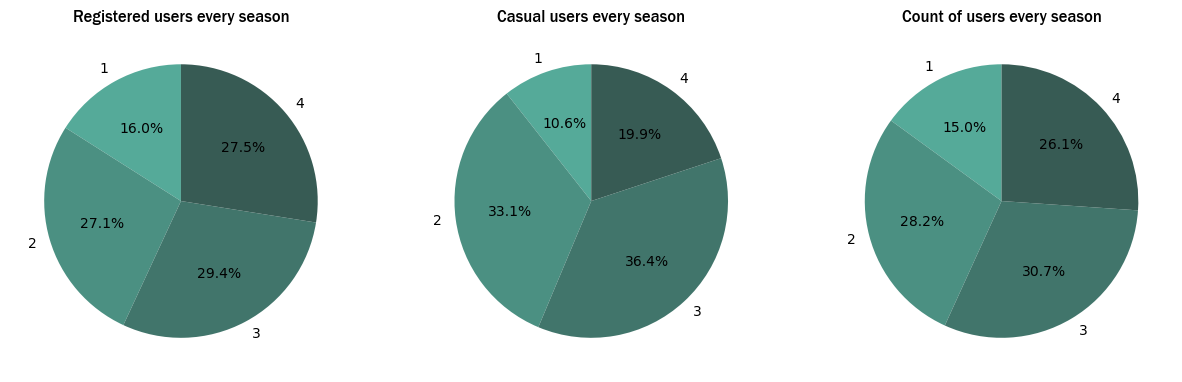

In [29]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_season1['registered'], labels=grouped_season1['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every season',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_season2['casual'], labels=grouped_season2['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every season',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_season3['count'], labels=grouped_season3['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users every season',fontname='Franklin Gothic Medium')
plt.show()

In [30]:
grouped_holiday1 = df.groupby('holiday')['registered'].sum().reset_index()
grouped_holiday2 = df.groupby('holiday')['casual'].sum().reset_index()
grouped_holiday3 = df.groupby('holiday')['count'].sum().reset_index()

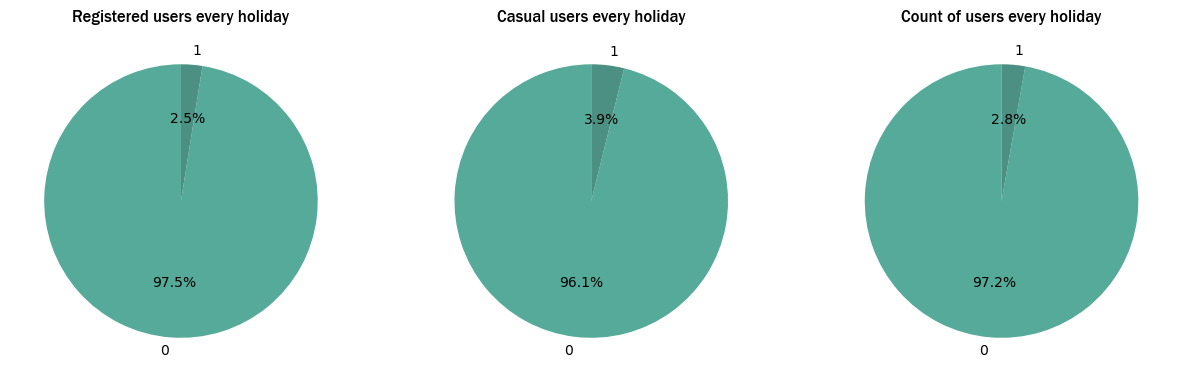

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_holiday1['registered'], labels=grouped_holiday1['holiday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every holiday',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_holiday2['casual'], labels=grouped_holiday2['holiday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every holiday',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_holiday3['count'], labels=grouped_holiday3['holiday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users every holiday',fontname='Franklin Gothic Medium')
plt.show()

In [32]:
grouped_workingday1 = df.groupby('workingday')['registered'].sum().reset_index()
grouped_workingday2 = df.groupby('workingday')['casual'].sum().reset_index()
grouped_workingday3 = df.groupby('workingday')['count'].sum().reset_index()

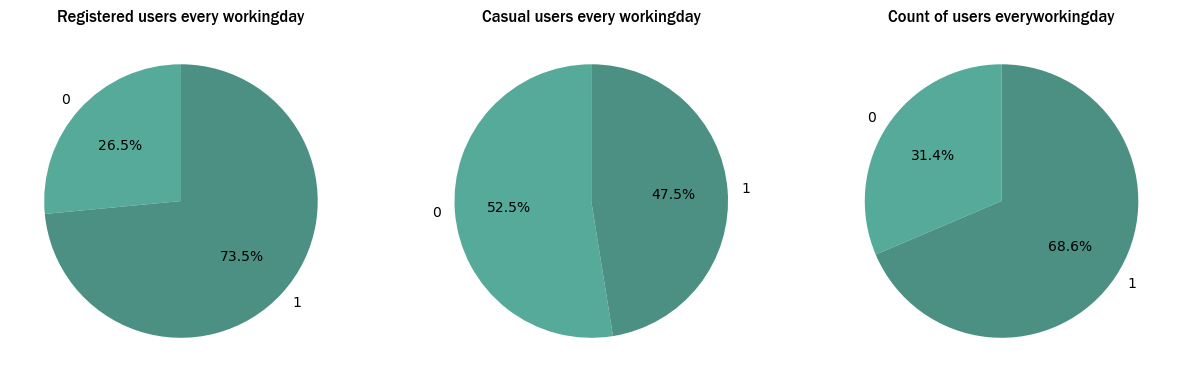

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_workingday1['registered'], labels=grouped_workingday1['workingday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every workingday',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_workingday2['casual'], labels=grouped_workingday2['workingday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every workingday',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_workingday3['count'], labels=grouped_workingday3['workingday'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users everyworkingday',fontname='Franklin Gothic Medium')
plt.show()

In [34]:
grouped_weather1 = df.groupby('weather')['registered'].sum().reset_index()
grouped_weather2 = df.groupby('weather')['casual'].sum().reset_index()
grouped_weather3 = df.groupby('weather')['count'].sum().reset_index()

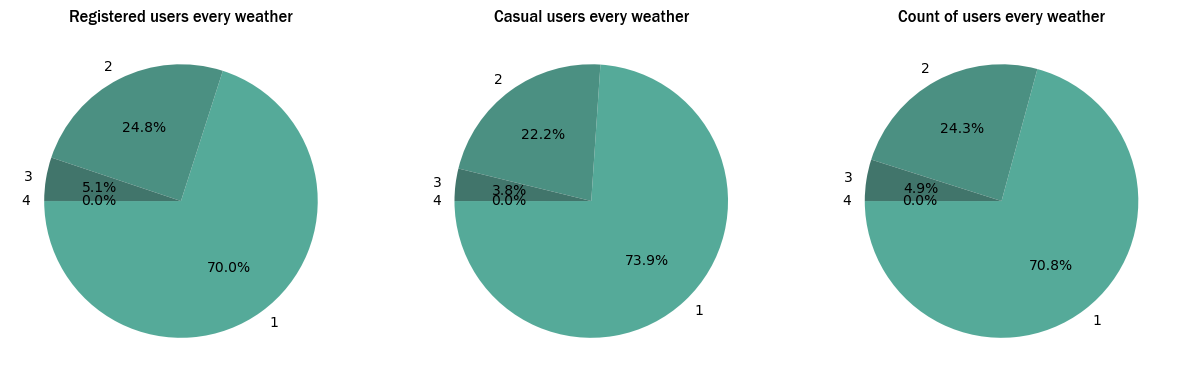

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_weather1['registered'], labels=grouped_weather1['weather'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every weather',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_weather2['casual'], labels=grouped_weather2['weather'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every weather',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_weather3['count'], labels=grouped_weather3['weather'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users every weather',fontname='Franklin Gothic Medium')
plt.show()

In [36]:
grouped_quarter1 = df.groupby('quarter')['registered'].sum().reset_index()
grouped_quarter2 = df.groupby('quarter')['casual'].sum().reset_index()
grouped_quarter3 = df.groupby('quarter')['count'].sum().reset_index()

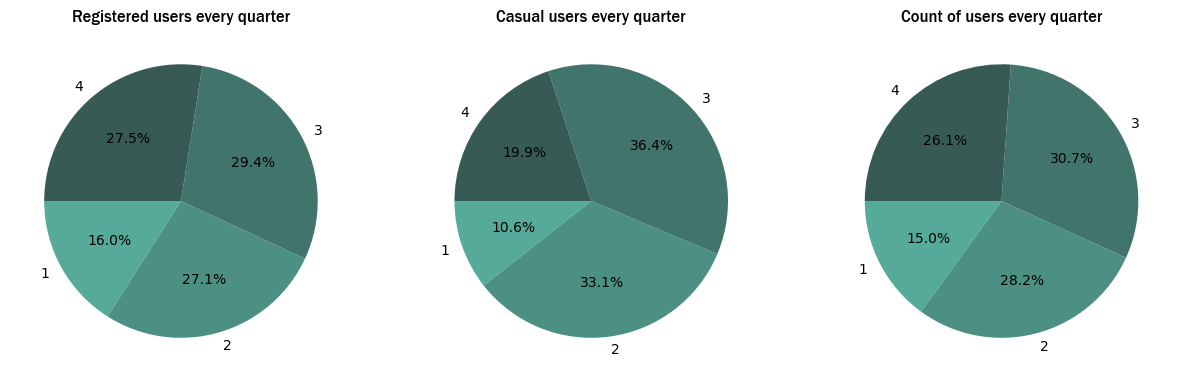

In [37]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_quarter1['registered'], labels=grouped_quarter1['quarter'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every quarter',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_quarter2['casual'], labels=grouped_quarter2['quarter'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every quarter',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_quarter3['count'], labels=grouped_quarter3['quarter'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users every quarter',fontname='Franklin Gothic Medium')
plt.show()

In [38]:
grouped_month1 = df.groupby('month')['registered'].sum().reset_index()
grouped_month2 = df.groupby('month')['casual'].sum().reset_index()
grouped_month3 = df.groupby('month')['count'].sum().reset_index()

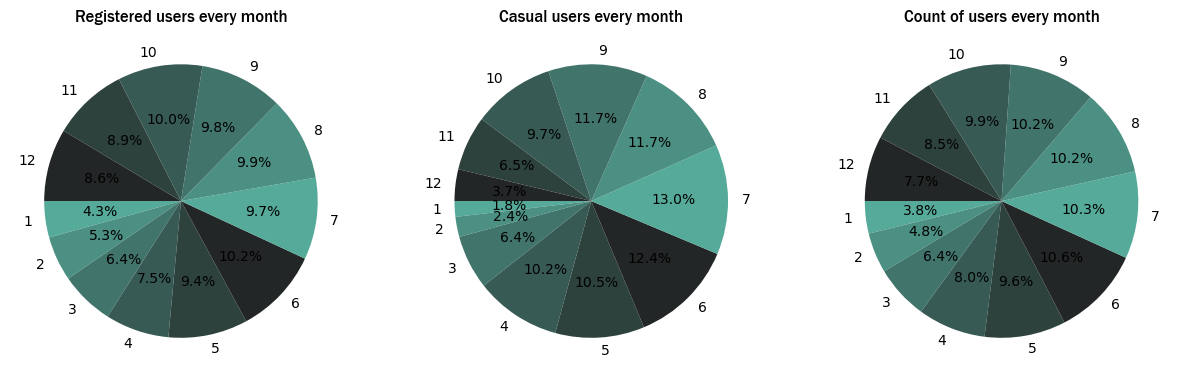

In [39]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(grouped_month1['registered'], labels=grouped_month1['month'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Registered users every month',fontname='Franklin Gothic Medium')
plt.subplot(1,3,2)
plt.pie(grouped_month2['casual'], labels=grouped_month2['month'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every month',fontname='Franklin Gothic Medium')
plt.subplot(1,3,3)
plt.pie(grouped_month3['count'], labels=grouped_month3['month'], autopct='%1.1f%%', startangle=180,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Count of users every month',fontname='Franklin Gothic Medium')
plt.show()

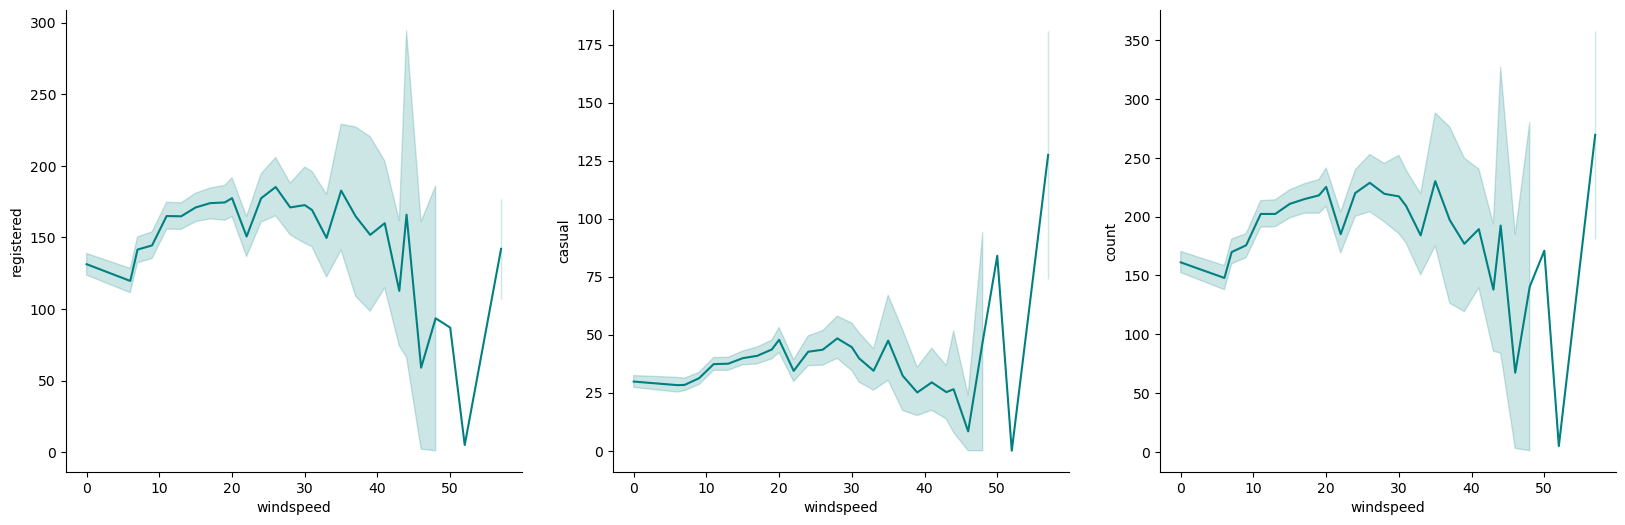

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.lineplot(x=df.windspeed,y=df.registered,color='teal')
plt.subplot(1,3,2)
sns.lineplot(x=df.windspeed,y=df.casual,color='teal')
plt.subplot(1,3,3)
sns.lineplot(x=df.windspeed,y=df['count'],color='teal')
sns.despine()
plt.show()

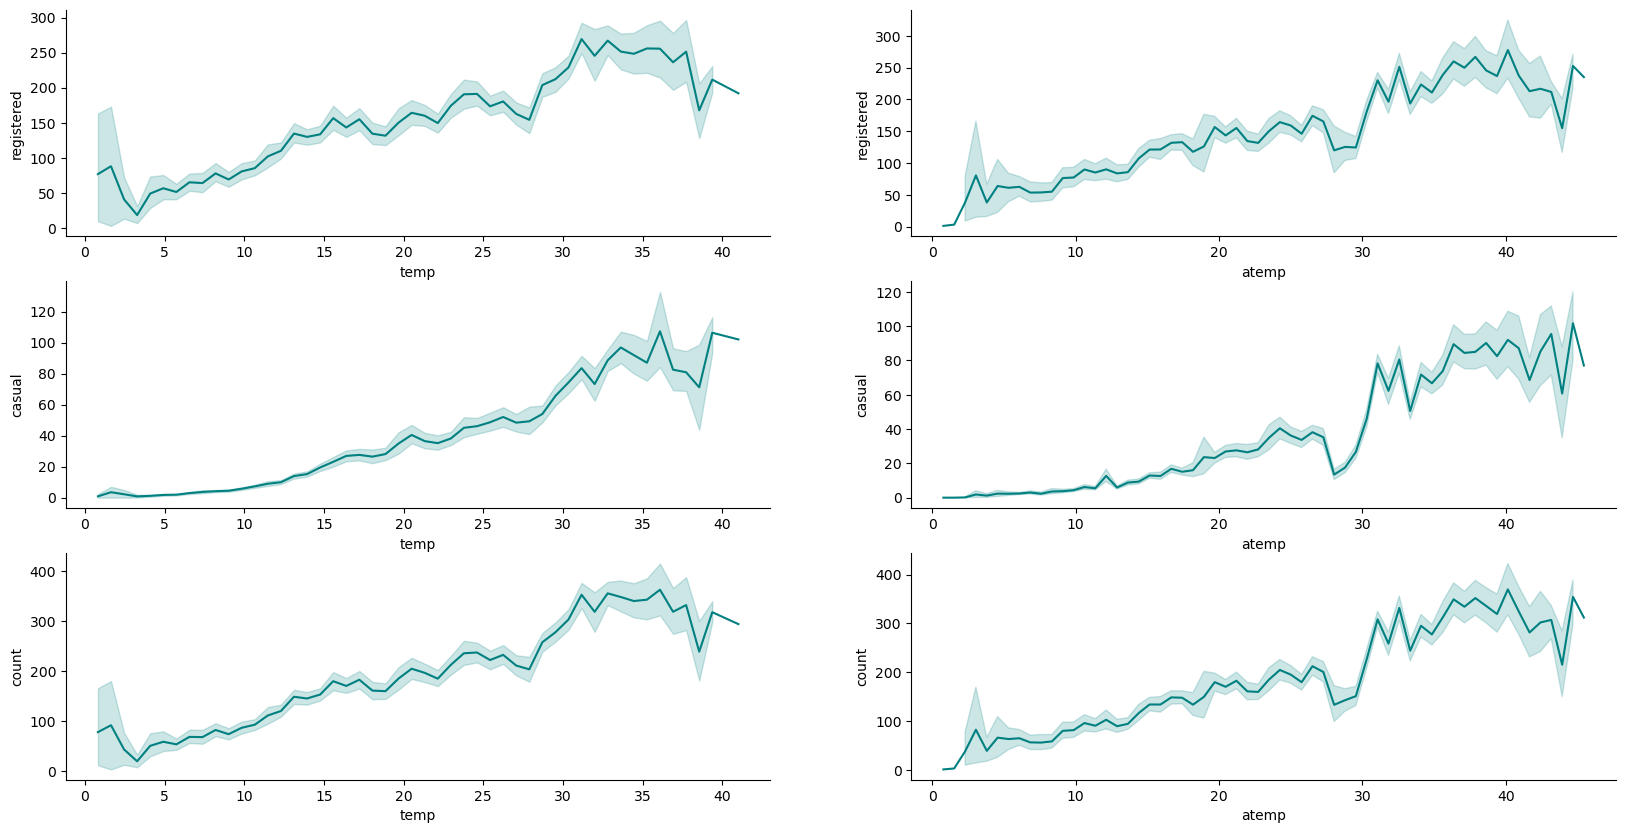

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.lineplot(x=df.temp,y=df.registered,color='teal')
plt.subplot(3,2,2)
sns.lineplot(x=df.atemp,y=df.registered,color='teal')
plt.subplot(3,2,3)
sns.lineplot(x=df.temp,y=df.casual,color='teal')
plt.subplot(3,2,4)
sns.lineplot(x=df.atemp,y=df.casual,color='teal')
plt.subplot(3,2,5)
sns.lineplot(x=df.temp,y=df['count'],color='teal')
plt.subplot(3,2,6)
sns.lineplot(x=df.atemp,y=df['count'],color='teal')
sns.despine()
plt.show()

# `INSIGHTS:-`

* Equal distrubution can be seen within hours of day, day, month as well as years.
* Registered as well as count customers follows the same distribution in the year 2011 but the distribution of both shrunk in the year 2012.
* Humidity increases as increase in quarter whereas windspeed decreases with increase in quarter.
* Temp as atemp have a strong correlation of 0.98 as both of them followed exact same pattern each year and dropped after 3rd quarter in each year while atemp is subtly on a higher side.
* Registered, casual and count of users folows the same pattern each quarter yet casual users falls in 2012 in 2nd quarter.
* Season 3 holds the most number of customers that is 29% registered, 30% in count and 36% casual customers.
* Holidays does not see much of the users yet casual users retains most users in holidays(3.9%) among other type of users.
* Working days faces most of the users getting bikes that is 73% of registered, 47% of casual and 68% of count users.
* Weather that has few or partly clouds comprises most users like 70% registered, 73% in casual & 70% counts users.
* Quarter 3 holds the most number of customers that is 29% registered, 30% in count and 36% casual customers.
* Users wheather they are registered or count or casual, they all increase with increase in temp as well as a temp wheareas casual users droped when atemp was between 28-30.